In [43]:
import numpy as np
from sklearn import datasets, cluster
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from tqdm import tqdm
import sys, os
from PIL import Image
sys.path.append('..')
from analyzer import *



  9%|▊         | 11/127 [00:00<00:01, 108.15it/s]

(50, 50, 3)


100%|██████████| 127/127 [00:01<00:00, 109.45it/s]


(7500, 127)


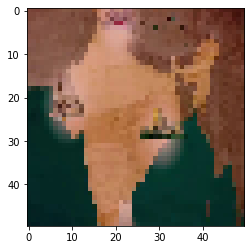

In [104]:
img = Image.open('samples/frame0.jpg')
img2 = cv2.resize(np.array(img), (50,50))
print(img2.shape)
plt.imshow(img2)

images = []
for fname in tqdm(os.listdir('samples')):
    img = Image.open('samples/'+fname)
    img2 = cv2.resize(np.array(img), (50,50))
    images.append(img2.ravel())
X = np.array(images).T
print(X.shape)

In [125]:
agglo = cluster.FeatureAgglomeration(n_clusters=127)
agglo.fit(X) 
Y = agglo.transform(X)
Y.shape

(7500, 127)

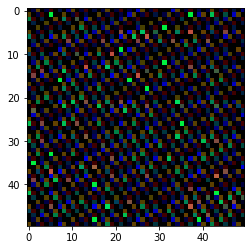

In [126]:
img = Y[:,2].reshape((50,50,3))
img = Image.fromarray(img, 'RGB')
plt.imshow(img)

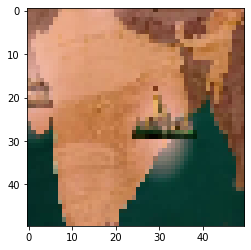

In [109]:
img = X[:,4].reshape((50,50,3))
img = Image.fromarray(img, 'RGB')
plt.imshow(img)

In [13]:
model = ResNet18()

def img2vec(fname):
    img = Image.open(fname)
    vec = model.extract_feature(img)
    return vec

vecs = []
fnames = []
for fname in tqdm(os.listdir('samples')):
    v = img2vec('samples/'+fname)
    vecs.append(v)
    fnames.append(fname)

X = np.array(vecs)
print(X.shape)

100%|██████████| 127/127 [00:13<00:00,  9.06it/s]

(127, 512)


In [15]:
X = X.T
agglo = cluster.FeatureAgglomeration(n_clusters=10)
agglo.fit(X) 
Y = agglo.transform(X)
Y.shape

(512, 10)

In [17]:
y = Y.T[0]
y.shape

(512,)

In [21]:
np.argmax(np.dot(X.T, y))

29

In [31]:
np.linalg.norm((X.T - X.T[0]), axis=1)

array([ 0.   , 19.88 , 22.36 , 22.08 , 20.8  , 27.62 , 15.336, 21.64 ,
       20.92 , 24.3  , 18.88 , 15.914, 20.97 , 19.39 , 23.27 , 26.53 ,
       22.22 , 24.8  , 17.16 , 26.92 , 21.61 , 17.94 , 25.7  , 22.5  ,
       16.06 , 22.5  , 24.3  , 19.17 , 25.58 , 20.56 , 27.06 , 28.17 ,
       24.78 , 19.39 , 16.77 , 20.64 , 20.66 , 22.67 , 17.89 , 25.22 ,
       20.39 , 20.92 , 14.9  , 25.2  , 24.92 , 19.05 , 19.5  , 25.23 ,
       25.23 , 21.   , 21.98 , 28.78 , 16.02 , 19.94 , 24.78 , 17.14 ,
       16.78 , 17.97 , 17.3  , 19.73 , 21.33 , 21.86 , 21.53 , 20.78 ,
       17.61 , 22.84 , 16.64 , 15.625,  8.9  , 21.17 , 23.3  , 22.25 ,
       16.6  , 15.97 , 21.83 , 23.14 , 18.05 , 16.97 , 19.86 , 27.14 ,
       26.52 , 23.22 , 15.51 , 21.42 , 23.92 , 17.39 , 20.94 , 16.78 ,
       22.28 , 20.25 , 27.56 , 18.17 , 18.73 , 19.42 , 21.72 , 22.77 ,
       21.1  , 19.86 , 17.   , 22.77 , 21.69 , 21.39 , 15.984, 15.89 ,
       19.17 , 20.55 , 20.47 , 21.86 , 21.12 , 16.72 , 15.01 , 20.64 ,
      

In [33]:
y.shape

(512,)

In [37]:
for x in X.T:
    diff = x - y
    print(np.linalg.norm(diff))

11.317287391967149
17.792646701692266
21.03776159294477
19.455557777597694
17.767064914180303
25.26610743260466
13.669377913085661
21.045658752032185
17.205741031822622
21.868213859105865
17.052063935367595
9.605424560035868
18.802045716335122
16.334444891381445
21.161023520743765
24.384930396102057
19.423756636038757
23.591228164222585
12.057523773747729
24.70541557667464
18.301416860498882
12.807123476803781
23.357568514603535
19.736657981431556
9.05580159878387
20.23544744743711
21.850482320231166
16.90718350568439
23.180914910701226
17.083758040413674
24.861168664091288
26.733359171246263
23.361283931089115
16.12382547945513
9.847840707296172
15.619795791453912
17.700794261778256
19.581440219559322
13.53638578757007
23.07368093292851
16.919987894206894
15.813025000907123
13.356574806649439
23.178962208957156
21.144305883724336
17.423543024068373
19.062009824884896
23.082114333011912
23.112308385372113
17.888663919510357
20.653777933880097
27.365318096930306
11.788737438033857
16.75